In [10]:
import os
from keras.preprocessing import image
import numpy as np
import tensorflow as tf




In [11]:
model_rps =  tf.keras.models.load_model('rps.h5')

In [12]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import scipy

TRAINING_DIR = "E:\Work\JUPITERC/archive"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "E:\Work\JUPITERC/rps-cv-images"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2188 images belonging to 3 classes.
Found 2184 images belonging to 3 classes.


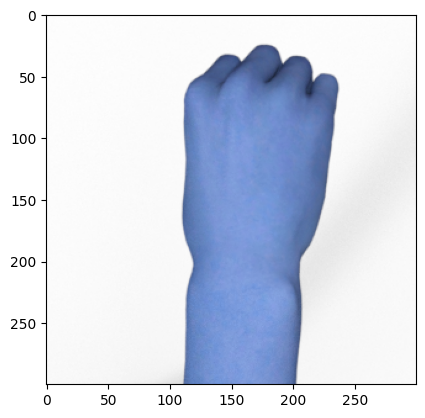

In [13]:
import cv2
from matplotlib import pyplot as plt
#img = cv2.imread('C:/Users/Admin/Desktop/JUPITER/IMGtest/bumaga/testpaper04-23.png')
img = cv2.imread('E:\Work\JUPITERC\IMGtest\kamen/testrock01-20.png')
#img = cv2.imread('C:/Users/Admin/Desktop/JUPITER/IMGtest/nozhnicy/testscissors03-24.png')

plt.imshow(img)
plt.show()

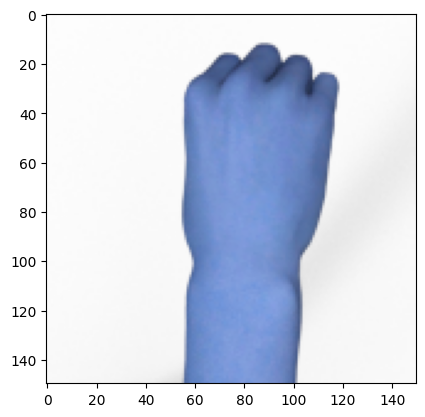

In [14]:
resize = tf.image.resize(img, (150,150))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [15]:
yhat = model_rps.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 142ms/step


In [16]:
yhat[0]

array([5.0006094e-03, 9.9499941e-01, 1.8156441e-12], dtype=float32)

In [17]:
huy = yhat[0]
rez = huy.min()
rez1 = str(rez)
rez2 = rez1[0]+ rez1[1] + rez1[2]+ rez1[3]
rez = float(rez2)
rez
# scisors >3 & <4
#
# rock >1 & <2

1.81

In [18]:
# отслеживать только последний элемент в списке!

if (rez >= 0) and (rez < 2): 
    print(f'Predicted class is rock')
if (rez >= 2) and (rez < 3):
    print(f'Predicted class is paper')
if (rez >= 3) and (rez < 4):
    print(f'Predicted class is scisors')


Predicted class is rock


In [19]:
classNames = []
classFile = 'coco.names'
with open (classFile, 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
print(classNames)

['rock', 'paper', 'scisors']


In [5]:
tf.saved_model.save(model_rps, "tmp_model")

INFO:tensorflow:Assets written to: tmp_model\assets


INFO:tensorflow:Assets written to: tmp_model\assets


In [6]:
!python3 -m tf2onnx.convert --saved-model tmp_model --output "model.onnx"

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.
